In [1]:
from math import cos,pi,sin,exp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets, Button
import matplotlib.gridspec as gridspec

In [2]:

%matplotlib notebook

Button(description='PAUSE', style=ButtonStyle())

interactive(children=(FloatSlider(value=1.0, description='x0', max=5.0, min=-5.0), FloatSlider(value=3.0, desc…

<IPython.core.display.Javascript object>


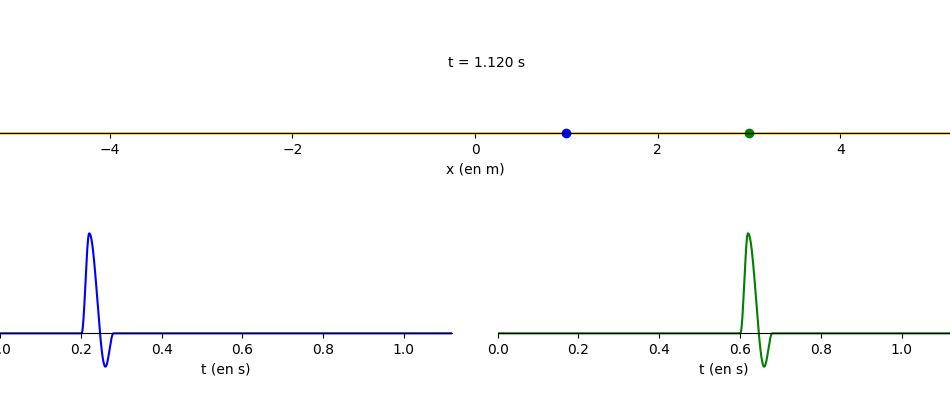

In [3]:
dt = 5
start = Button(description="PAUSE")
display(start)
pause = True

def draw():
    global ti,p0,p1,s,v,sx0,sx1,st,tl,dt,ax1,ax2,ax3,simulation
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    ax1.plot(x,st,"orange")
    ax1.plot(x[p0],st[p0],"o",color="blue")
    ax1.plot(x[p1],st[p1],"o",color="green")
    ax1.set_ylim([-1,2])
    ax1.set_yticks([])
    ax1.set_xlim([-5.2,5.2])
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.set_xlabel("x (en m)")
    
    ax2.set_xlim([0,5.6/v])
    ax2.set_ylim([-1,2])
    ax2.set_yticks([])
    ax2.set_xlabel("t (en s)")
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.spines['bottom'].set_position(('data',0))
    ax2.spines['left'].set_position(('data',0))
    ax2.plot(tl,sx0,"blue")
    
    ax3.set_xlim([0,5.6/v])
    ax3.set_ylim([-1,2])
    ax3.set_yticks([])
    ax3.set_xlabel("t (en s)")
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    ax3.spines['left'].set_color('none')
    ax3.xaxis.set_ticks_position('bottom')
    ax3.spines['bottom'].set_position(('data',0))
    ax3.spines['left'].set_position(('data',0))
    ax3.plot(tl,sx1,"green")
    simulation.frame_seq = simulation.new_frame_seq() 
    
@interact(x0=(-5,5,0.1),x1=(-5,5,0.1),sens=["x croissants","x décroissants"],c=(1,10,1))
def setx0(x0=1,x1=3,sens="x croissants",c = 5):
    global ti,p0,p1,s,v,sx0,sx1,st,tl,dt,x
    ti=0
    p0 = x0
    p1 = x1
    if sens =="x croissants":
        s = 1
    else:
        s = -1
    v = c
    sx0=[0]
    tl=[0]
    sx1=[0]
    
   
    motif=[-0.25+0.25*cos(i/20*pi) for i in range(20)]+[0.5-cos(i*pi/40) for i in range(40)]+[0.75+0.75*cos(i*pi/19) for i in range(20)]
    if s == 1:
        x=[-5.2+i/200 for i in range(2080)]
        st=[0]*960+motif+[0]*1040
        p0 = int((x0+5.2)*200)
        p1 = int((x1+5.2)*200)
    else:
        x=[-5.2+i/200 for i in range(2080)]
        st = [0]*1040+motif[::-1]+[0]*960
        p0 = int((x0+5.2)*200)
        p1 = int((x1+5.2)*200)
    try:
        draw()
    except:
        pass

def anime(i):
    global ti,p0,p1,s,v,sx0,sx1,st,tl,dt,start,x,pause,simulation
    print(i)
    ax1.clear()
    ax2.clear()
    ax3.clear()
    for j in range(2*v):
        if s == 1:
            tl.append(tl[-1]+dt/(v*1000))
            sx0.append(st[p0])
            sx1.append(st[p1])
            st.pop()
            st.insert(0,0)
        else:
            tl.append(tl[-1]+dt/(v*1000))
            sx0.append(st[p0])
            sx1.append(st[p1])
            st.pop(0)
            st.append(0)
    ax1.plot(x,st,"orange")
    ax1.plot(x[p0],st[p0],"o",color="blue")
    ax1.plot(x[p1],st[p1],"o",color="green")
    ax1.set_ylim([-1,2])
    ax1.set_yticks([])
    ax1.set_xlim([-5.2,5.2])
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.set_xlabel("x (en m)")
    if tl[-1]<= 5.6/v:
        ax1.text(-0.3,1,"t = {:.3f} s".format(tl[-1]))
    else:
        ax1.text(-0.3,1,"t = {:.3f} s".format(5.6/v))
    ax2.set_xlim([0,5.6/v])
    ax2.set_ylim([-1,2])
    ax2.set_yticks([])
    ax2.set_xlabel("t (en s)")
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.spines['bottom'].set_position(('data',0))
    ax2.spines['left'].set_position(('data',0))
    ax2.plot(tl,sx0,"blue")
    
    ax3.set_xlim([0,5.6/v])
    ax3.set_ylim([-1,2])
    ax3.set_yticks([])
    ax3.set_xlabel("t (en s)")
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    ax3.spines['left'].set_color('none')
    ax3.xaxis.set_ticks_position('bottom')
    ax3.spines['bottom'].set_position(('data',0))
    ax3.spines['left'].set_position(('data',0))
    ax3.plot(tl,sx1,"green")
    return (ax1,ax2,ax3)
   
    
fig = plt.figure(figsize=(9.5, 4))
#gs = gridspec.GridSpec(1, 1)
plt.gcf().subplots_adjust(left = 0.05, bottom = 0.,right = 0.95, top = 1., wspace = 0.1, hspace = 0)
ax1 = fig.add_subplot(211)#gs[0,:])
ax2 = fig.add_subplot(223)#gs[1,0])
ax3 = fig.add_subplot(224)#gs[1,1])
#ax1.set_xlim([0,20])
#ax1.set_xticks([0,10,20])
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_yticks([])
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_yticks([])
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')
ax3.set_yticks([])

#ax3 = fig.add_subplot(gs[])
fig.show()





setx0()
simulation=animation.FuncAnimation(fig,anime,frames = 200,blit=True,interval=20*dt,save_count=50)

def go(b = None):
    global dt,start,fig,simulation,pause
    if pause:
        pause = not pause
        start.description="PLAY"
        simulation.event_source.stop()
    else:
        pause = not pause
        start.description="PAUSE"
        simulation.event_source.start()
    return

    
start.on_click(go)